In [1]:
import tifffile
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from reco_helper import reconstruct_one_slice

In [4]:
from scipy.signal import convolve2d
from skimage.morphology import diamond
import numpy as np

footprint = np.array([[0, 1, 0], 
                      [1, 1, 1], 
                      [0, 1 ,0]])

mask = footprint / footprint.sum()

footprint_l = np.array(diamond(2))

mask_l = footprint_l / footprint_l.sum()

In [7]:
before = tifffile.imread('/mnt/data/denoising/xeno/reco/all_volumes/15.tif')
after = tifffile.imread('/mnt/data/denoising/xeno/reco/all_volumes_processed/15.tif')

In [50]:
selector = (1000, slice(800, 1200), slice(900, 1300))
# selector = (1000, slice(200, 1200), slice(500, 1500))

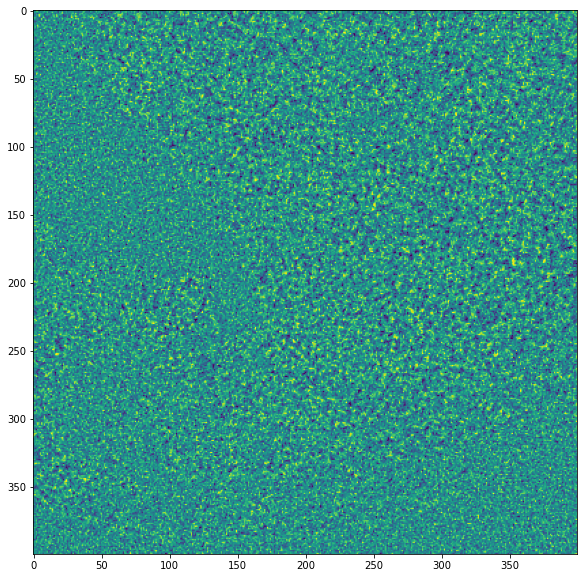

In [51]:
plt.figure(figsize=(10, 10))
plt.imshow(before[selector])
plt.show()

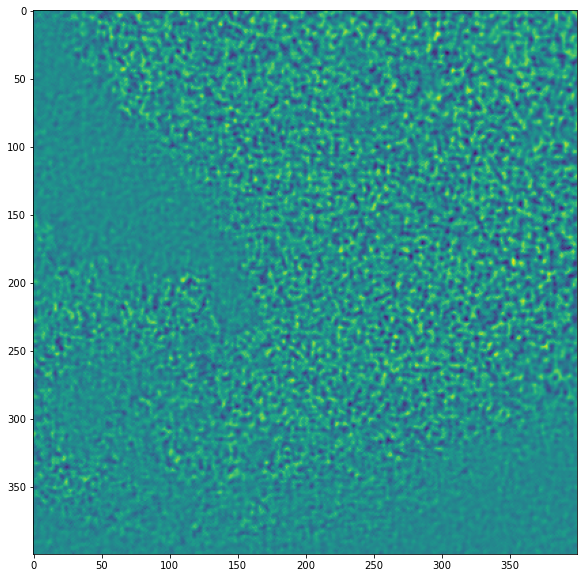

In [52]:
plt.figure(figsize=(10, 10))
plt.imshow(after[selector])
plt.show()

In [53]:
rb_sm = convolve2d(before[selector], mask, mode='same')

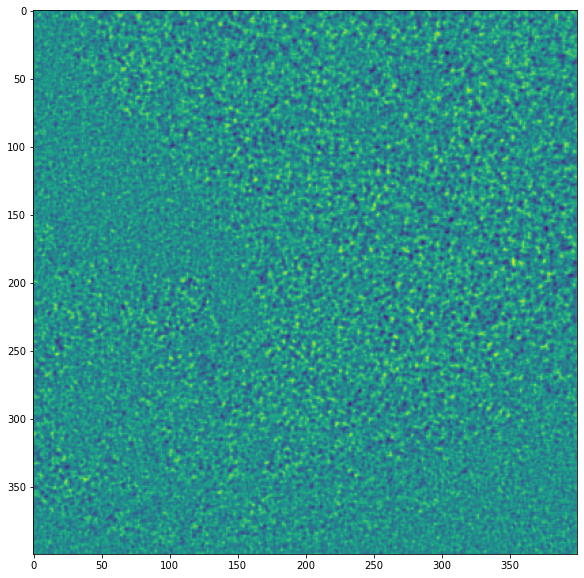

In [54]:
plt.figure(figsize=(10, 10))
plt.imshow(rb_sm)
plt.show()

In [55]:
from skimage.restoration import denoise_nl_means, estimate_sigma

In [59]:
%%time
rb_dnlm = denoise_nl_means(before[selector], patch_size=2, patch_distance=100)

CPU times: user 1min 6s, sys: 61.8 ms, total: 1min 7s
Wall time: 1min 7s


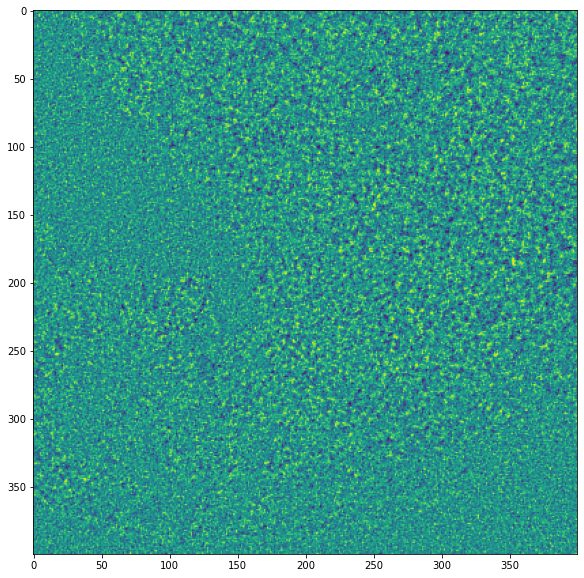

In [60]:
plt.figure(figsize=(10, 10))
plt.imshow(rb_dnlm)
plt.show()